In [1]:
# Densities

In [2]:
# ...
import sys;sys.path.append('../..')
from abslithist.words import *

dfnorms = format_norms_as_long(get_allnorms())
dfnorms

wordavg=dfnorms[['word','z']].groupby('word').mean()
wordavg


,z
word,
I,0.950954
Inf,-1.584783
a'ch,0.665675
a'mighty,0.481090
a'most,1.059315
...,...
ụneuthur,0.822855
ụr,0.829154
ụreiḍiol,0.848191


In [3]:
def txt2df(txt):
    txtl=tokenize(txt,lower=False,modernize=False)
    df=pd.DataFrame()
    df['tok']=txtl
    df['i']=list(range(len(txtl)))
    df['tokl']=df['tok'].apply(lambda x: x.lower())
    return df.set_index('tokl').join(wordavg,how='left').reset_index().sort_values('i')

In [4]:
import lltk
C=lltk.load('CanonFiction')
C.au

,index,tok,i,z
140120,regent,REGENT,2,-0.477253
141607,royal,ROYAL,10,-0.053473
90635,highness,HIGHNESS,11,-0.423120
135674,permission,PERMISSION,13,-0.772643
140909,respectfully,RESPECTFULLY,16,-0.454574
...,...,...,...,...
58480,ceremony,ceremony,191763,-0.246518
77797,fully,fully,191766,-1.171912
135460,perfect,perfect,191770,-0.749447
82406,happiness,happiness,191771,-1.220552


In [21]:
lltk.density??

Signature: lltk.density(df, key, figsize=(8, 6), vertical=False)
Docstring: <no docstring>
Source:   
def density(df, key, figsize=(8,6), vertical=False):
    p9.options.figure_size=figsize
    fig = p9.ggplot(p9.aes(x=key, y='..count..', label='..count..'), data=df)
    fig+= p9.geom_density(alpha=0.5)
    fig+=p9.theme_classic()
    return fig
File:      ~/github/lltk/lltk/tools/plots.py
Type:      function


In [68]:
# plot
def plot_densityz(df,title=''):
    p9.options.dpi=600
    p9.options.figure_size=(8,4)
    df=df.dropna()

    # density plot
    avgstr=f'Average = {round(df.z.mean(),2)}'
    
    fig=p9.ggplot(p9.aes(x='z',y='..count..'))
    for nn in range(25):
        fig+=p9.geom_density(data=df.sample(n=1000,replace=True))

    fig+=p9.labs(
        title=f'Distribution of word concreteness scores (n={len(df.dropna())})\n{"in "+title if title else ""}',
        x='Concreteness score',
        y='Number of instances'
    )
    fig+=p9.theme(title=p9.element_text(size=10))
    fig+=p9.xlim(-3,3)
    fig+=p9.geom_vline(xintercept=df.z.mean(),alpha=0.5)
    fig+=p9.geom_vline(xintercept=0,alpha=0.25)
    fig+=p9.geom_text(x=df.z.mean()+0.05,y=10,label=avgstr,inherit_aes=False,size=8,ha='left')
    
    
    return fig

In [63]:
df = txt2df(C.au.Austen.EmmaANovelInThreeVolume.txt)
df.dropna()

,index,tok,i,z
140120,regent,REGENT,2,-0.477253
141607,royal,ROYAL,10,-0.053473
90635,highness,HIGHNESS,11,-0.423120
135674,permission,PERMISSION,13,-0.772643
140909,respectfully,RESPECTFULLY,16,-0.454574
...,...,...,...,...
58480,ceremony,ceremony,191763,-0.246518
77797,fully,fully,191766,-1.171912
135460,perfect,perfect,191770,-0.749447
82406,happiness,happiness,191771,-1.220552


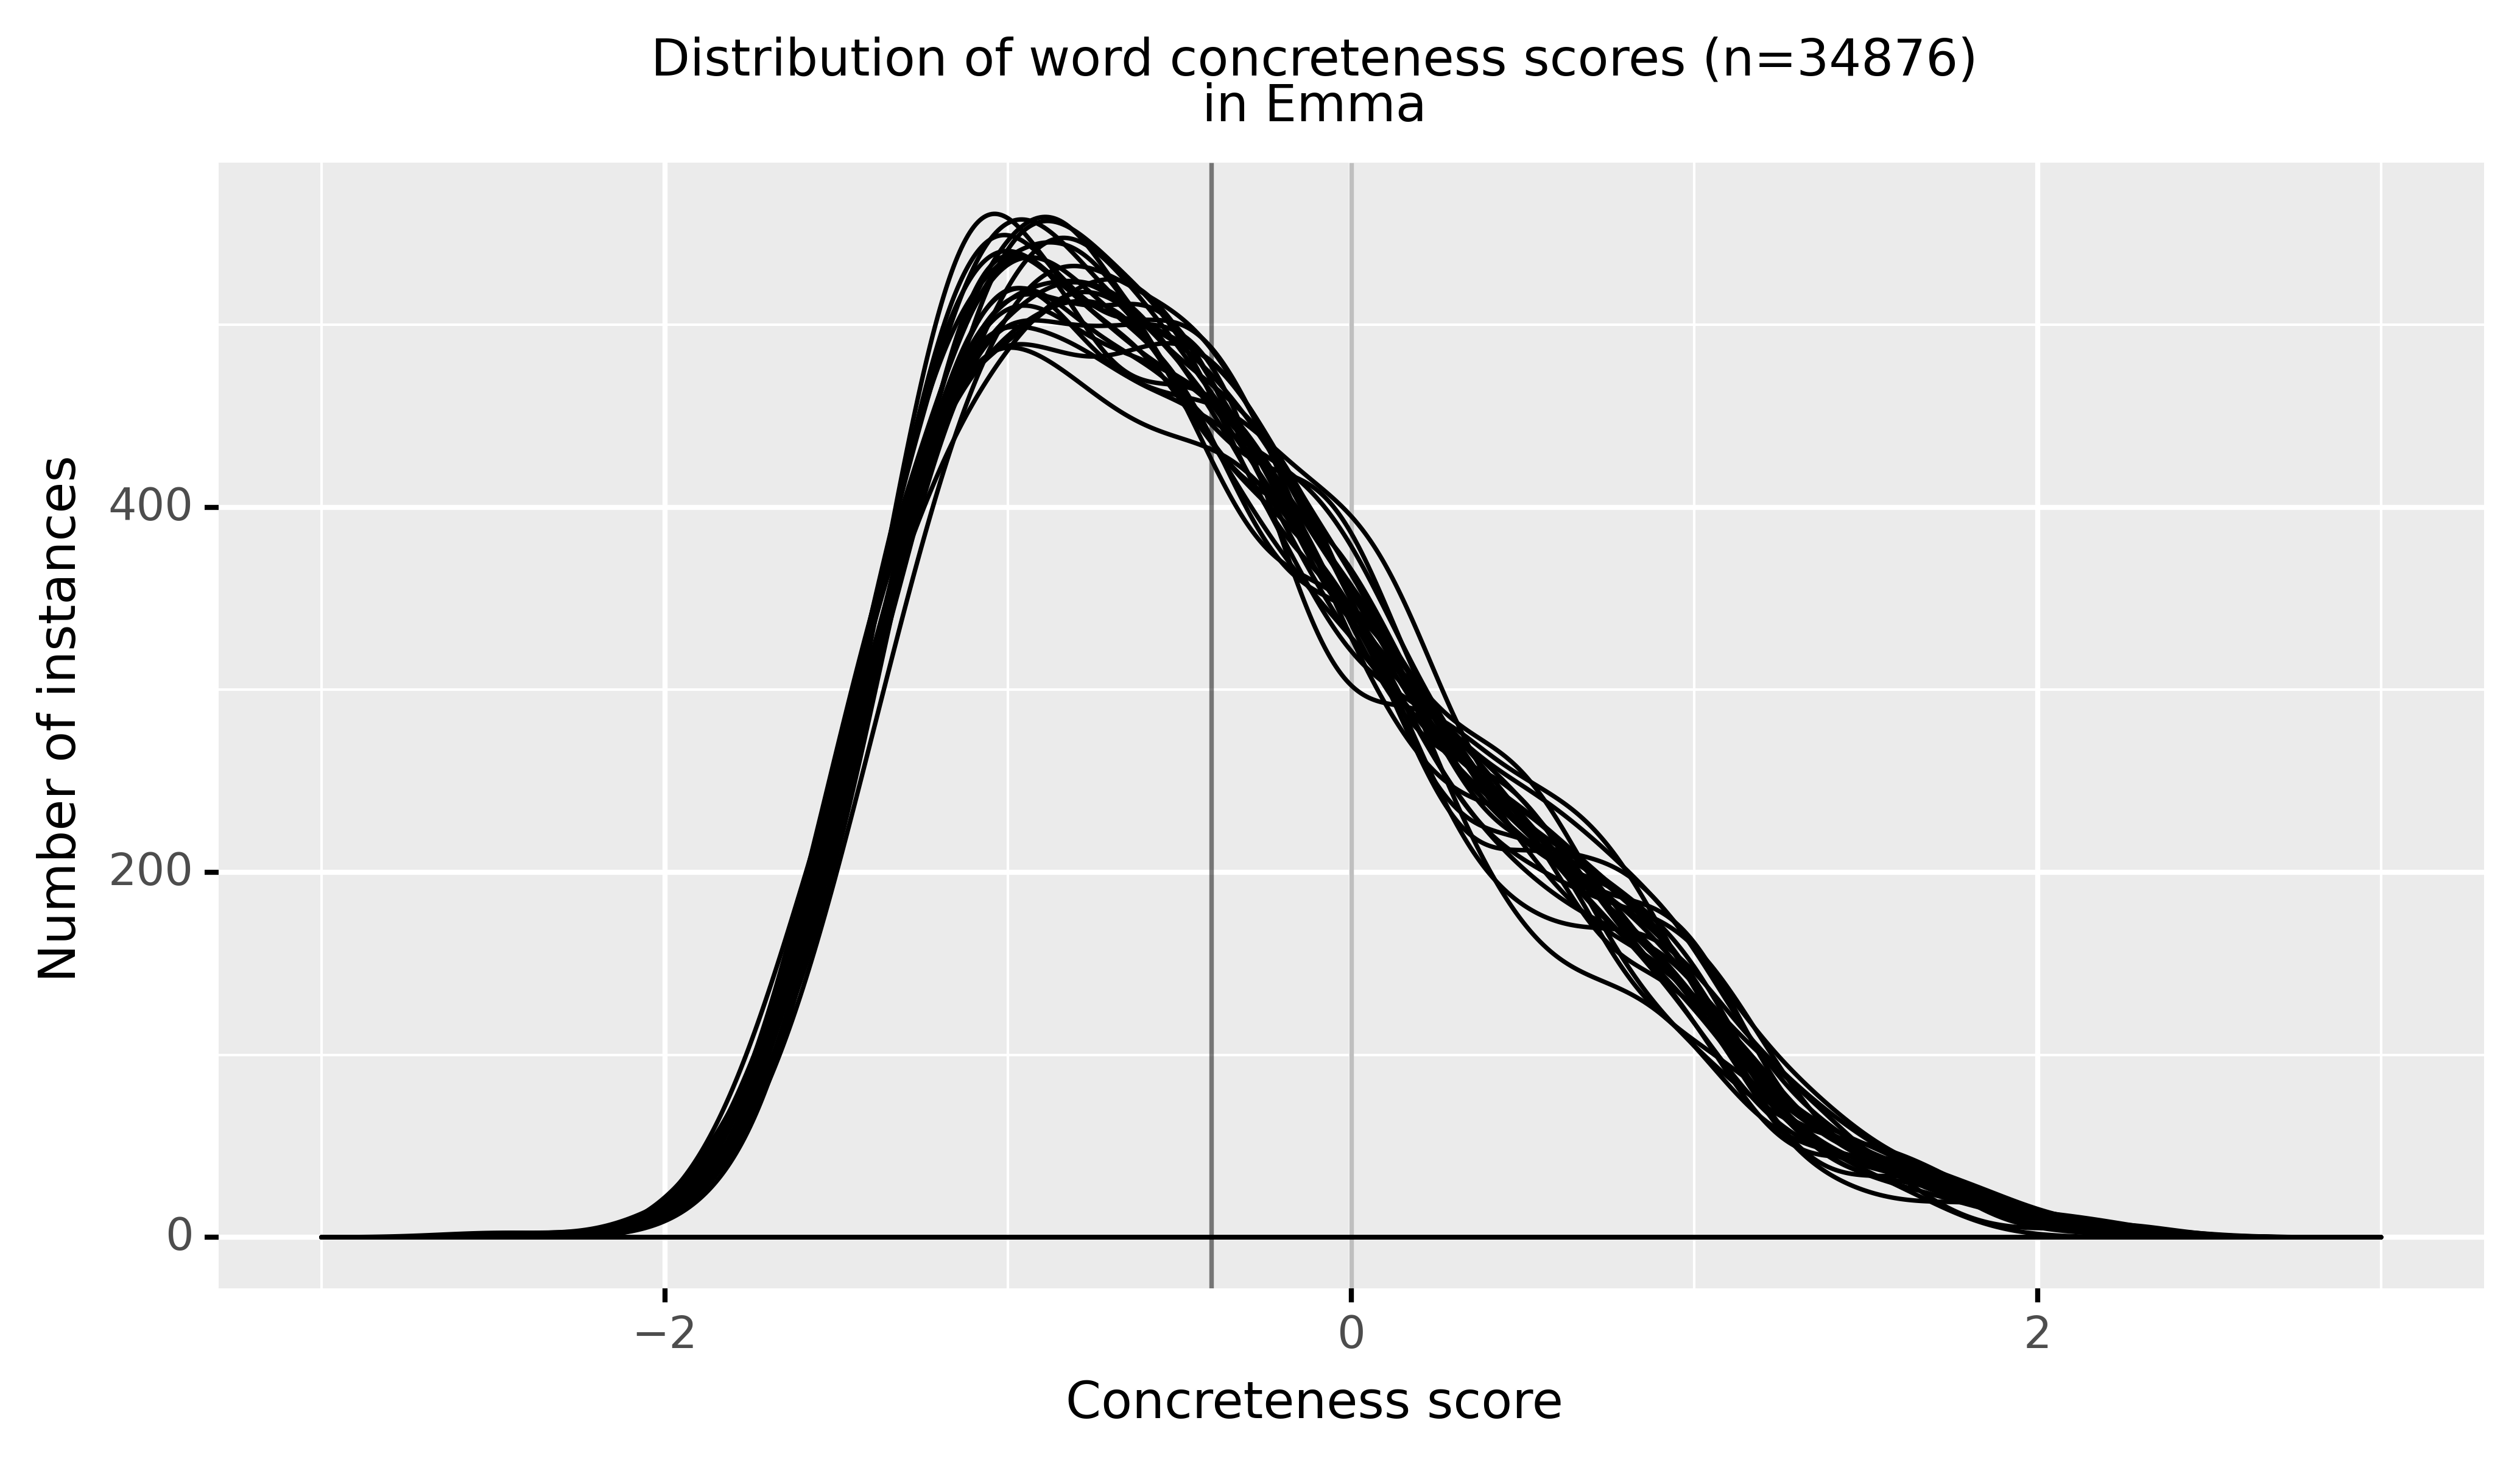

<ggplot: (8780697074733)>

In [64]:
plot_densityz(df,'Emma')

In [69]:
def plot_densityz_t(t):
    ofn=f'../../figures/density/{t.id}.png'
    if os.path.exists(ofn): return
    df = txt2df(t.txt)
    fig=plot_densityz(df,f'{t.author},\n{t.title} ({t.year})')
    fig.save(ofn)
    return fig

In [72]:
plot_densityz_t(C.au.Austen.MansfieldParkANovelInTh)

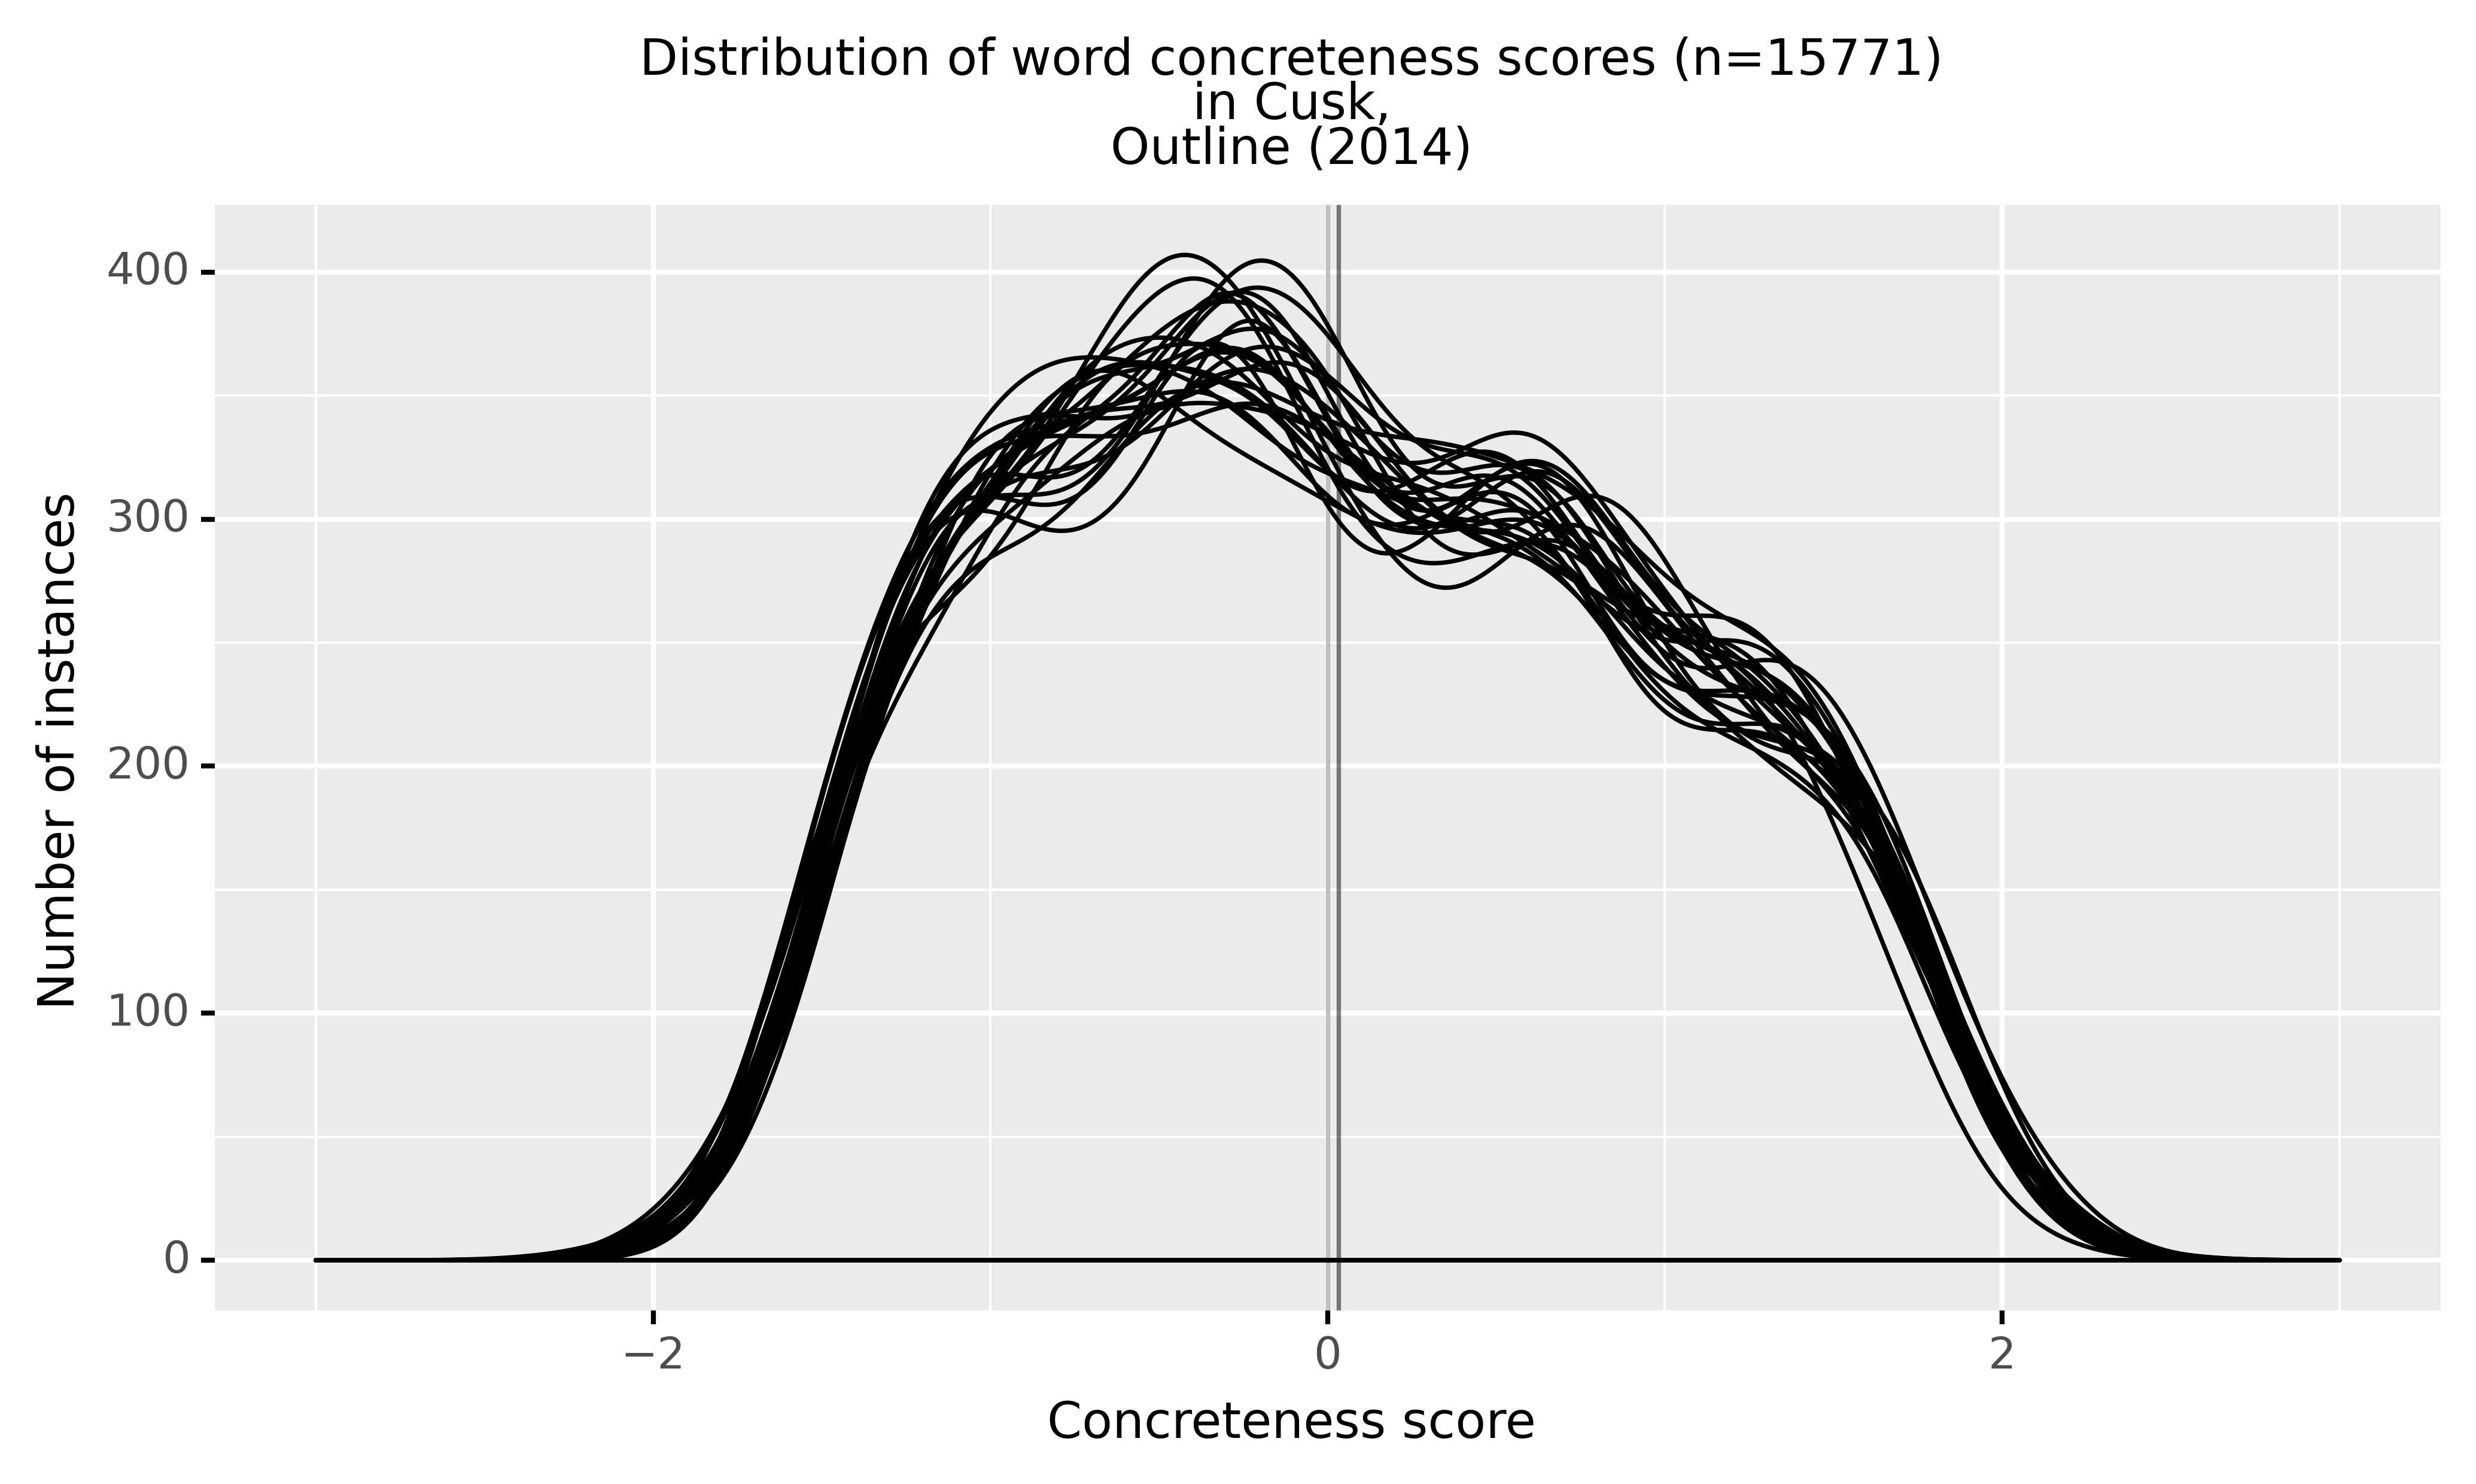

<ggplot: (8780664172465)>

In [73]:
plot_densityz_t(C.au.Cusk.Outline)

In [75]:
for t in tqdm(C.texts()):
    plot_densityz_t(t)